In [73]:
import sqlite3
connection = sqlite3.connect('student_grades.db', timeout=10)
cursor = connection.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students (student_id)
)
''')
connection.commit()

students = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

cursor.executemany('''
INSERT INTO students (first_name, last_name)
VALUES (?, ?)
''', students)

grades = [
    (1, 'Math', 95),
    (1, 'English', 100),
    (1, 'History', 99),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 89),
    (3, 'English', 92),
    (3, 'History', 87),
    (4, 'Math', 78),
    (4, 'English', 65),
    (4, 'History', 70),
    (5, 'Math', 91),
    (5, 'English', 89),
    (5, 'History', 94)
]

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade)
VALUES (?, ?, ?)
''', grades)

connection.commit()

#1
query = '''
SELECT DISTINCT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id;
'''
print("Students' names and their grades:")
cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)
print()
#2
query2 = '''
SELECT DISTINCT students.first_name, students.last_name, AVG(grades.grade) as average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id;
'''

print("Average grade for each student:")
cursor.execute(query2)
results = cursor.fetchall()
for row in results:
    print(row)
print()

#3
query3 = '''
SELECT DISTINCT students.first_name, students.last_name, AVG(grades.grade) as average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY average_grade DESC
LIMIT 1
'''
print("Student with the highest average grade:")
cursor.execute(query3)
results = cursor.fetchall()
for row in results:
    print(row)
print()

#4
query4 = '''
SELECT AVG(grade) as average_math_grade
FROM grades
WHERE subject = 'Math'
'''

print("Highest average grade for math:")
cursor.execute(query4)
results = cursor.fetchall()
for row in results:
    print(row)
print()

#5
query5 = '''
SELECT DISTINCT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade >= 90
'''

print("Students who scored above 90 in any subject:")
cursor.execute(query5)
results = cursor.fetchall()
for row in results:
    print(row)
print()

# bonus
query6 = '''
SELECT DISTINCT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE (grades.subject, grades.grade) IN (
    SELECT subject, MAX(grade)
    FROM grades
    GROUP BY subject
)
'''
print("Student with the highest grade in each subject:")
cursor.execute(query6)
results = cursor.fetchall()
for row in results:
    print(row)




Students' names and their grades:
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 100)
('Alice', 'Johnson', 'History', 99)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 89)
('Carol', 'White', 'English', 92)
('Carol', 'White', 'History', 87)
('David', 'Brown', 'Math', 78)
('David', 'Brown', 'English', 65)
('David', 'Brown', 'History', 70)
('Eve', 'Davis', 'Math', 91)
('Eve', 'Davis', 'English', 89)
('Eve', 'Davis', 'History', 94)

Average grade for each student:
('Alice', 'Johnson', 98.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 89.33333333333333)
('David', 'Brown', 71.0)
('Eve', 'Davis', 91.33333333333333)

Student with the highest average grade:
('Alice', 'Johnson', 98.0)

Highest average grade for math:
(87.0,)

Students who scored above 90 in any subject:
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 100)
('Alice', 'Johnson', 'History', 99)
('Carol', 'White', 'English', 92)

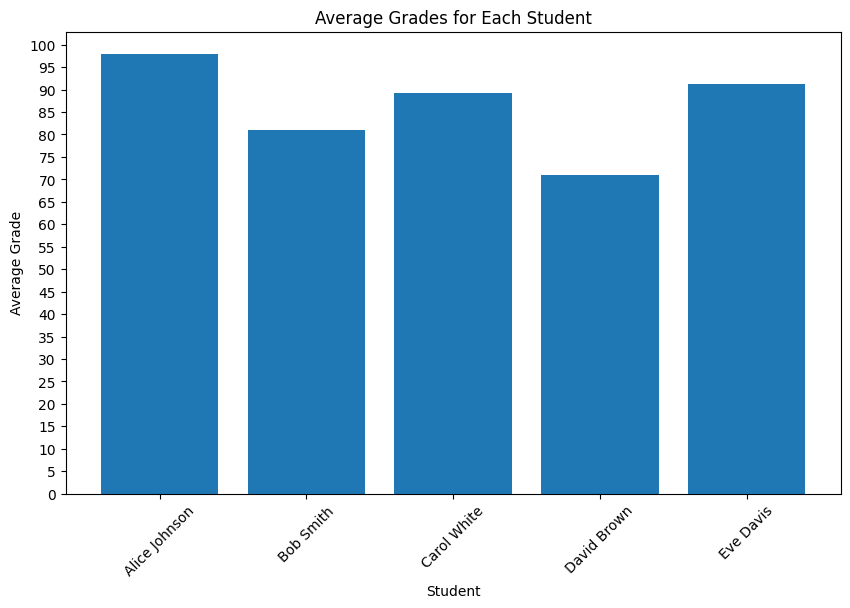

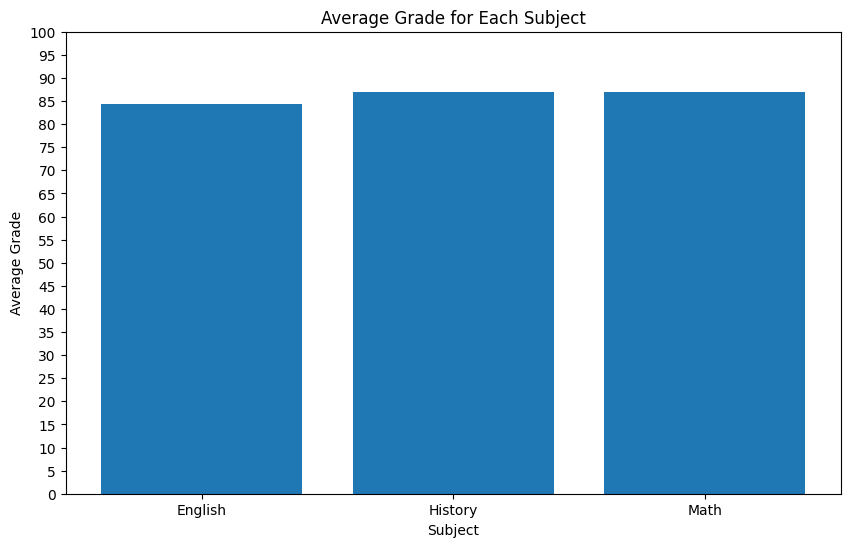

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


students_df = pd.read_sql_query('SELECT * FROM students', connection)
grades_df = pd.read_sql_query('SELECT * FROM grades', connection)

combined_df = pd.read_sql_query('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''', connection)


average_grades = combined_df.groupby(['first_name', 'last_name'])['grade'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_grades['first_name'] + ' ' + average_grades['last_name'], average_grades['grade'])
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.xticks(rotation=45)
plt.yticks(np.arange(0,105, 5))
plt.show()


average_subject_grades = combined_df.groupby('subject')['grade'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_subject_grades['subject'], average_subject_grades['grade'])
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Subject')
plt.yticks(np.arange(0,105, 5))
plt.show()

connection.close()